In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time as time

In [6]:
_columns = {
            'id':0,
            'type':1,
            'nom':2,
            'adresse':3,
            'lat':4,
            'lon':5,
            'duration':6,
            'score':7,
            'description':8,
            'tags':9,
            'vecteur':10,
            'extra':11}
            
_type = {
          'Parcs':0,
          'resto':1,
          'Evenements WE':2,
          'Patrimoine cult hist':3
          }
            

class Activity: #activity
    #constructor    
    def __init__(self, name='', type_='',lat=0.0, lng=0.0,s=0.0,t=0.0):
        
        #name
        self.name = name
        #position
        
        #GPS coordinates
        self.lat = lat #latitude
        self.lng = lng #longitude
        
        #score
        self.score = s
        self.duration = t
        self.type=type_
        
    def set_base_columns(self,row):
         #name
        self.name = row[_columns['nom']]
        
        #type
        self.type = row[_columns['type']]       
        
        #id
        self.id=row[_columns['id']]
        
        #address
        self.adresse=row[_columns['adresse']]
        
        #extra
        self.extra=row[_columns['extra']]
        
        #description
        self.description=row[_columns['description']]
 
        #duration
        self.duration = float(row[_columns['duration']])
        
        #tags
        self.tags = row[_columns['tags']]
        
        #score
        self.score = row[_columns['score']]
        
        #position
        self.lat =float(row[_columns['lat']]) #x coordinate
        self.lng = float(row[_columns['lon']]) #y coordinate
        
    def afficher(self):
         print self.name+' ('+str(self.lat)+','+str(self.lng)+')'

    def toJSON(self):
        return json.dumps(self, default=lambda o: o.__dict__, 
            sort_keys=True, indent=4)
            
    def distance(self,b):
        #return np.sqrt( np.square(self.x_coord-b.x_coord) + np.square(self.y_coord-b.y_coord)) #euclidean distance
        return 1.852 * 60.0 * np.arccos(np.sin(self.lat * np.pi / 180.)*np.sin(b.lat* np.pi / 180.)+np.cos(self.lat* np.pi / 180.)*np.cos(b.lat* np.pi / 180.)*np.cos((self.lng-b.lng)* np.pi / 180.)) #bird-fly distance, in km, using GPS coordinates
        #return ( np.square(self.x_coord-b.x_coord) + np.square(self.y_coord-b.y_coord))


In [ ]:
class Journey:
    
    #constructor
    def __init__(self, idty=0, act=[]):
        self.idty=idty
        self.activities = act
        self.tour = range(len(act))
        self.tour_distance = 0.0
        self.score = 0.0
        self.nb_eval_dist=0
        
    def compute_score(self):
        return 0.0
    
    #remove one activity
    def remove(self, act):
        return
    
    #add one activity
    def insert(self, act):
        
        n=len(self.activities) #total number of activities currently in the journey
        
        if (n==0):
            self.tour.append(0)
            self.activities.append(act)
            return
        
        else:
        
            #activity act is inserted at the end of self.activities list
            #in the tour, we perform a least costly insertion
            
            #compute least costly insertion
            best_insertion = 1
            best_insertion_cost = np.inf
            for i in range(1,n+1):
                #compute improvement if (act) is inserted at position i
                insertion_cost = self.activities[self.tour[(i-1) %n]].distance(act) + self.activities[self.tour[i%n]].distance(act) - self.activities[self.tour[(i-1)%n]].distance(self.activities[(self.tour[i%n])]) 
                self.nb_eval_dist = self.nb_eval_dist+3
                
                if(insertion_cost < best_insertion_cost):
                    best_insertion = i
                    best_insertion_cost = insertion_cost
        
            #insert at best position
            self.tour.insert(best_insertion,n)
            #print 'Inserted', n, 'at position', best_insertion
            self.tour_distance = self.tour_distance+best_insertion_cost
            self.activities.append(act)
        
        return
    
    #replace activity1 by activity2
    def replace(self, act1, act2):
        
        self.remove(act1)
        self.insert(act2)
        n=len(self.activities)
        return
    
        #first, find act1's index and position in the tour
        act1_idx = 0
        act1_pos = 0
        for i in range(n):
            if self.activities[i]==act1:
                act1_idx = i
            if self.activities[tour[i]] ==act1:
                act1_pos = i
        
        print act1_idx, act1_pos
        
        #then, remove it from the tour
        tour_variation = - self.activities[self.tour[(act1_pos-1) %n]].distance(act1) - self.activities[self.tour[(act1_pos+1)%n]].distance(act1) + self.activities[self.tour[(act1_pos-1)%n]].distance(self.activities[(self.tour[(act1_pos+1)%n])]) 
        self.tour_distance = self.tour_distance + tour_improvement
        self.tour.remove(act1_pos)
        
        #replace act1 by act2 in the list of activities
        self.activities[act1_idx] = act2
        
        
        #compute least costly insertion
        best_insertion = 1
        best_insertion_cost = np.inf
        for i in range(1,n+1):
            #compute improvement if (act) is inserted at position i
            insertion_cost = self.activities[self.tour[(i-1) %n]].distance(act2) + self.activities[self.tour[i%n]].distance(act2) - self.activities[self.tour[(i-1)%n]].distance(self.activities[(self.tour[i%n])]) 
            self.nb_eval_dist = self.nb_eval_dist+3
              
            if(insertion_cost < best_insertion_cost):
                best_insertion = i
                best_insertion_cost = insertion_cost
        
        #insert at best position
        self.tour.insert(best_insertion,act1_idx)
        #print 'Inserted', n, 'at position', best_insertion
        self.tour_distance = self.tour_distance+best_insertion_cost
        return
        
    def lk2_tsp(self):
        n=len(self.tour)
        b=False #loop not finished yet
        while(b)
            b=False
            for i in range(n):
                for j in range(i+1,n):
                    gain = -self.activities[tour[i]%n].distance(self.activities[tour[i+1]%n])-self.activities[tour[j]%n].distance(self.activities[tour[j+1]%n])+self.activities[tour[i]%n].distance(self.activities[tour[j]%n])+self.activities[tour[i+1]%n].distance(self.activities[tour[j+1]%n])
                    if(gain>0):
                        b=True
                        #modify the tour
        return
    
    def greedy_tsp(self):
        return
        

In [8]:
def journey_optimizer_master(activity_set, tMax, nBest):
    
    #Activity_set is a list of activities
    #assume scores are weighted to reflect user's preferences for each type of activity
    n=len(activity_set)
    nType= 4 #only 4 different types ID in the DataBase as of now
    
    #objective: find a subset of activities that maximise total score
    #while respecting some time constraint
    # => this is a knapsack problem
    
    #1. sort activities by decreasing ratios score / time_needed 
    activities = sorted(activity_set, key=lambda x: -x.score / (x.duration+0.00001)) #protect from duration being 0.00
    
    #3. Approximately solve the knapsack problem
    #greedily add activities as long as the total duration is less than the max allowed
    t_tot=0.0
    nbActiSelected=0
    while(t_tot<=tMax and nbActiSelected<n):
        if (t_tot+activities[nbActiSelected].duration <= tMax):
            #add item
            t_tot=t_tot+activities[nbActiSelected].duration
            nbActiSelected=nbActiSelected+1
        else:
            break
    
    actiSelected = [activities[i] for i in range(nbActiSelected)]

    return compute_tsp_tour(actiSelected)

In [9]:
def journey_optimizer_stochastic(activity_set, tMax, nBest):
    
    nType=4
    discount = [0.5, 0.2, 0.2, 0.7] #discount factors, used to limit the number of events of the same type
    #seperate activities by type (so we don't have three restaurants in a proposition)
    activitiesByType=[[]]*nType
    scoreByType=[[]]*nType
    softmaxByType=[[]]*nType

    nbPerType=[0]*nType
    for a in activity_set:
        activitiesByType[_type[a.type]].append(a)
        scoreByType[_type[a.type]].append(a.score / 100.0) #dividing scores by 100 makes the softmax more stable
        nbPerType[_type[a.type]] = nbPerType[_type[a.type]]+1
    
    #sort each activity set by decreasing score value
    for k in range(nType):
        activitiesByType[k] = sorted(activitiesByType[k], key=lambda x: -x.score)
        scoreByType[k] = sorted(scoreByType[k], key=lambda x: -x)
    
    #compute softmax values for scores
    for k in range(nType):
        softmaxByType[k] = np.exp(scoreByType[k]) / np.sum(np.exp(scoreByType[k]))
    
    #now generate random journeys, with at most one restaurant, one parcs, one buildings (if enough time) and one event 
    activities=[]

    start=time.time()
    while(time.time()-start<0.5):
        acti=[]
        
        #generate one activity per type, using the softmax values as the probability of choosing each element among a class
        for k in range(nType):
            r=np.random.rand()
            for i in range(nbPerType[k]):
                if(r<softmaxByType[k][i]):
                    acti.append(activitiesByType[k][i])
                    break
                else:
                    r=r-softmaxByType[k][i]
        
        #now, compute the total duration and total score of this journey
        sTot=0.0
        tTot=0.0
        for a in acti:
            tTot=tTot+a.duration
            sTot=sTot+a.score
            if tTot>tMax:
                #proposed journey is too long: discard it
                break
        
        if tTot>tMax:
            continue #proposed journey is too long: discard it
        else:
            activities.append((acti,sTot)) #keep journey    
    
    #sort journeys by decreasing total score
    nbJourneys=len(activities)
    if nbJourneys==0:
        return []
    
    activities=sorted(activities, key=lambda x: -x[1])
    
    #only keep the nBest journeys, if they exist
    activities=[activities[i] for i in range(np.min([nbJourneys, nBest]))]
    
    #finally, sort the remaining journeys, by computing their TSP tour approximations
    activities_sorted=activities
    for i in range(len(activities)):
        activities_sorted[i] = compute_tsp_tour(activities[i][0])
    
    return activities

0.00399994850159


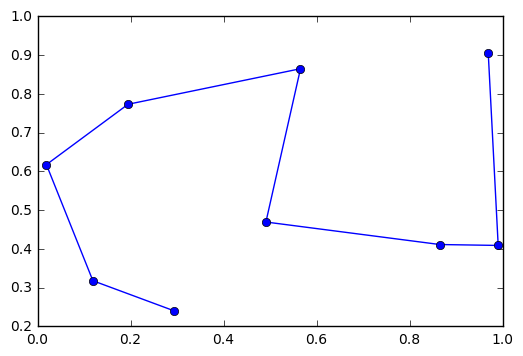

0.518000125885
3
[<__main__.Activity instance at 0x0000000006F6ED48>, <__main__.Activity instance at 0x0000000006F6ED48>, <__main__.Activity instance at 0x0000000007105F88>]


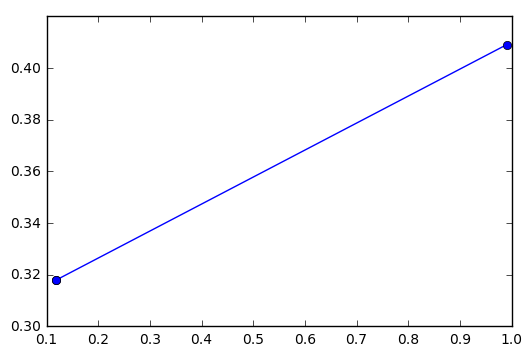

3
[<__main__.Activity instance at 0x0000000006F6EB88>, <__main__.Activity instance at 0x0000000006F6ED48>, <__main__.Activity instance at 0x0000000007105F88>]


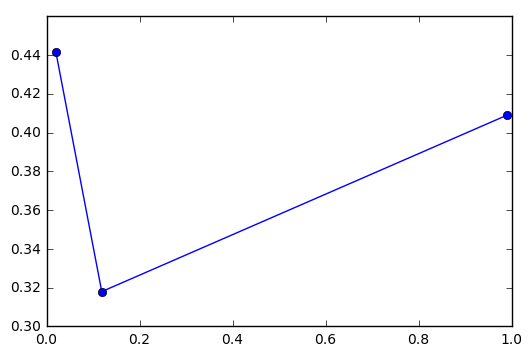

3
[<__main__.Activity instance at 0x0000000006F77E08>, <__main__.Activity instance at 0x00000000071367C8>, <__main__.Activity instance at 0x0000000007105F88>]


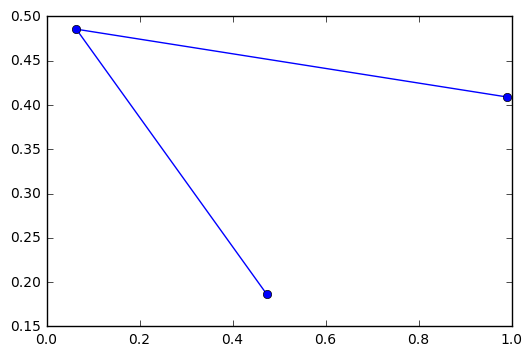

3
[<__main__.Activity instance at 0x0000000006F77E08>, <__main__.Activity instance at 0x0000000006F6ED48>, <__main__.Activity instance at 0x0000000007105F88>]


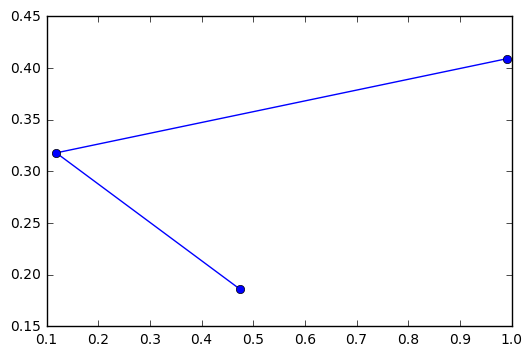

3
[<__main__.Activity instance at 0x0000000006F6ED48>, <__main__.Activity instance at 0x0000000006F6ED48>, <__main__.Activity instance at 0x0000000006F77E08>]


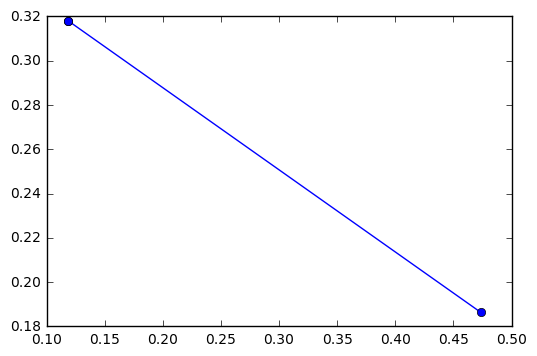

In [13]:
acti_list=[]
np.random.seed(0)
start=time.time()
typeList=['Parcs',
          'resto',
          'Evenements WE',
          'Patrimoine cult hist']
for i in range(100):
    s=100*np.random.rand()
    w=2*np.random.rand()+0.25
    t=np.random.randint(0,4)
    a = Activity('',typeList[t],np.random.rand(),np.random.rand(),s,w)
    acti_list.append(a)


acti_journey = journey_optimizer_master(acti_list, 6, 1)
end=time.time()

print end-start

journey=acti_journey
x=np.zeros(len(journey))
y=np.zeros(len(journey))

for i in range(len(journey)):
    x[i]=journey[i].lat
    y[i]=journey[i].lng
    
plt.plot(x,y,'o-')
plt.show()

start=time.time()
acti_journey=journey_optimizer_stochastic(acti_list, 4, 5)
end=time.time()
print end-start

for journey in acti_journey:
    x=np.zeros(len(journey))
    y=np.zeros(len(journey))


    for i in range(len(journey)):
        x[i]=journey[i].lat
        y[i]=journey[i].lng
    print len(journey)
    print journey
    
    plt.plot(x,y,'o-')
    plt.show()

In [4]:
def compute_tsp_tour(activities):
    
    n=len(activities)
    
    #construct distance matrix
    dist=np.zeros((n,n))
    
    for i in range(n):
        for j in range(i+1,n):
            dist[i,j] = activities[i].distance(activities[j])
            dist[j,i] = dist[i,j]

   
    #start with greedy insertion
    tour_flag=[False]*n
    tour_idx=np.zeros(n)
    current_node=0
    for i in range(n):
        tour_idx[i]=current_node
        tour_flag[current_node]=True
        #find closest neighbour that is not in the tour
        closest_neighbour = current_node
        closest_distance = np.inf
        for j in range(n):
            if (tour_flag[j] or dist[current_node,j]>=closest_distance):
                #j is already in the tour
                continue
            else:
                closest_neighbour=j
                closest_distance = dist[current_node, j]
        
        current_node=closest_neighbour
    
    #compute tour
    sorted_activities=[None]*n
    for i in range(n):
        sorted_activities[i]=activities[int( tour_idx[i])]
        
    return sorted_activities

In [34]:
u=range(10)
for i in np.random.permutation(4):
    print u[i]

0
2
3
1
